In [1]:
import pandas as pd

df = pd.read_csv('games-features-Craig.csv')
# df = pd.read_csv('games-features.csv')

print("There are",len(df),"observations and",len(df.columns),"features in the dataset.")
print()
print("The features are",list(df.columns))

df.head()

There are 13357 observations and 78 features in the dataset.

The features are ['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate', 'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount', 'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIs

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


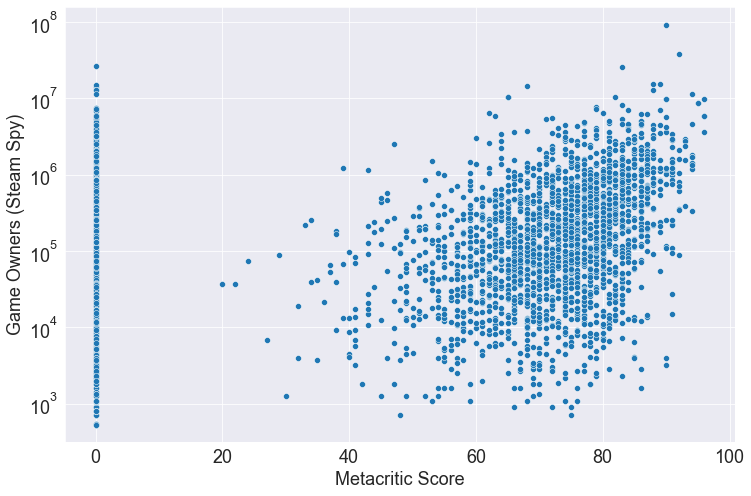

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_style("darkgrid")

f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Metacritic',y='SteamSpyOwners',data=df)

plt.xlabel("Metacritic Score",fontsize=18)
plt.ylabel("Game Owners (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("OwnersVsCritic.jpg")

plt.show()

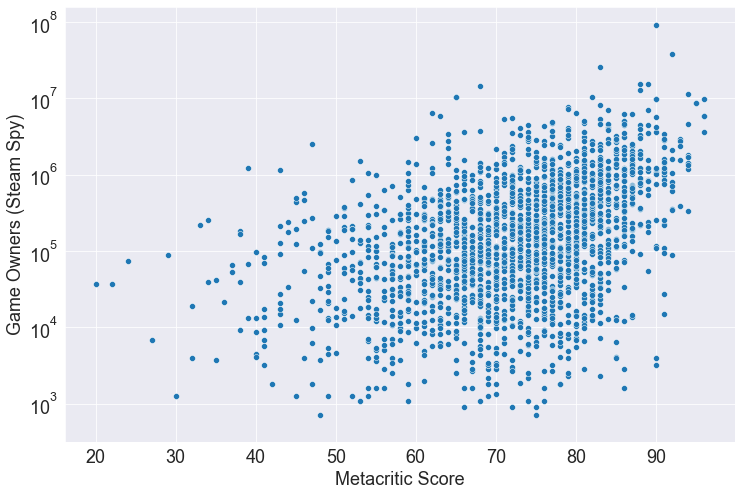

In [5]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Metacritic',y='SteamSpyOwners',data=df[df.Metacritic>0])

plt.xlabel("Metacritic Score",fontsize=18)
plt.ylabel("Game Owners (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("OwnersVsCritic.jpg")

plt.show()

# Let's try to build a simple regression model between SteamSpyOwners or SteamSpyPlayersEstimate and Metacritic Score

### Train-test split

In [52]:
import numpy as np

df_copy = df.loc[(df.Metacritic>0) & (df.SteamSpyPlayersEstimate>0)].copy()

df_copy['log(players)']=np.log(df_copy.SteamSpyPlayersEstimate)

df_train = df_copy.sample(frac = .75, random_state = 42)

df_test = df_copy.drop(df_train.index)

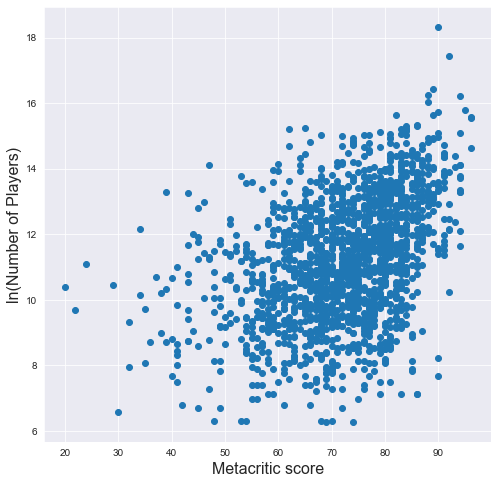

In [53]:
plt.figure(figsize = (8,8))

plt.scatter(df_train.Metacritic, df_train['log(players)'])

plt.xlabel("Metacritic score", fontsize =16)

plt.ylabel("ln(Number of Players)", fontsize = 16)

# plt.yscale('log')
# plt.ylim(10**2.5,10**8.2)

plt.show()

### Find Simple Linear Regression Fit between Metacritic score and ln(no_of_players) by minimizing MSE

In [54]:
X_bar = df_train.Metacritic.mean()
y_bar = df_train['log(players)'].mean()

## We get the covariance and variance
cov = df_train[['Metacritic','log(players)']].cov().iloc[0,1]
var = df_train.Metacritic.var()

## Here we calculate beta_1_hat
beta_1_hat = cov/var

## Here we calculate beta_0_hat
beta_0_hat = y_bar - beta_1_hat*X_bar

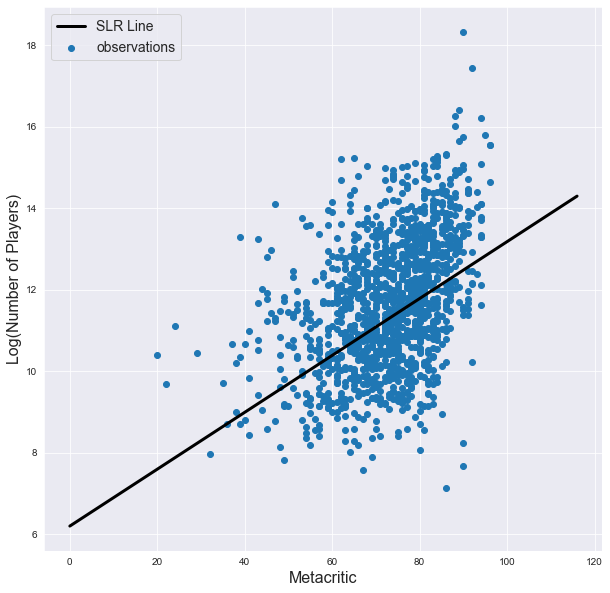

In [179]:
min_meta = df_train.Metacritic.min()
max_meta = df_train.Metacritic.max()
padding = 20
x = np.linspace(min_meta - padding,max_meta + padding,1000)

plt.figure(figsize = (10,10))

plt.scatter(df_train.Metacritic, df_train['log(players)'], label = "observations")

# Now add mean prediction line
plt.plot(x,beta_0_hat + beta_1_hat*x, 'k',
            label="SLR Line",
            linewidth = 3)

plt.xlabel("Metacritic", fontsize =16)

plt.ylabel("Log(Number of Players)", fontsize = 16)

plt.legend(fontsize=14,loc=2)

plt.show()

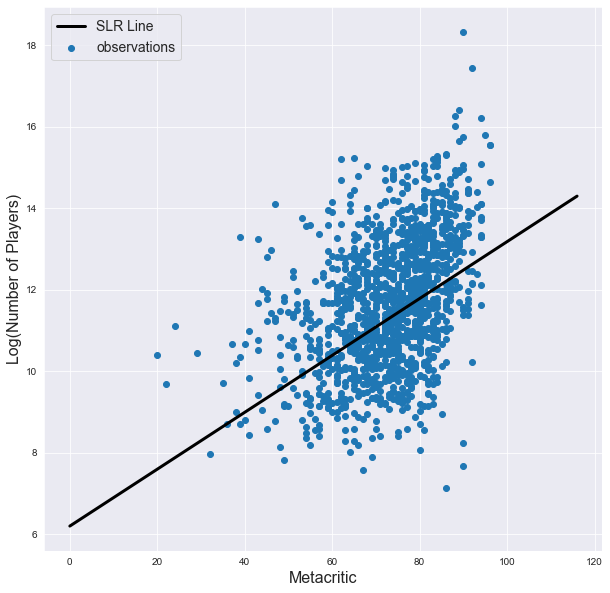

In [180]:
plt.figure(figsize = (10,10))

plt.scatter(df_train.Metacritic, df_train['log(players)'], label = "observations")

# Now add mean prediction line
plt.plot(x,beta_0_hat + beta_1_hat*x, 'k',
            label="SLR Line",
            linewidth = 3)

plt.xlabel("Metacritic", fontsize =16)

plt.ylabel("Log(Number of Players)", fontsize = 16)

plt.legend(fontsize=14,loc=2)

plt.savefig('PlayerCount vs Metacritic.png')

### Test Assumptions

Pearson Coefficient

In [63]:
r = cov/(np.sqrt(df_train.Metacritic.var())*np.sqrt(df_train['log(players)'].var()))

print("The pearson coef is",np.round(r,4))

The pearson coef is 0.4192


This link: https://online.stat.psu.edu/stat501/lesson/1/1.9 says that whether a certain value of the pearson coefficient corresponds to a linear relationship depends on the t-statistic, calculated as follows:

In [69]:
t=r*np.sqrt(len(df_train)-2)/np.sqrt(1-r**2)

print("The t-value is",np.round(t,4))

The t-value is 18.8299


Residuals

In [70]:
res =  df_train['log(players)'].values - (beta_0_hat + beta_1_hat * df_train.Metacritic.values)

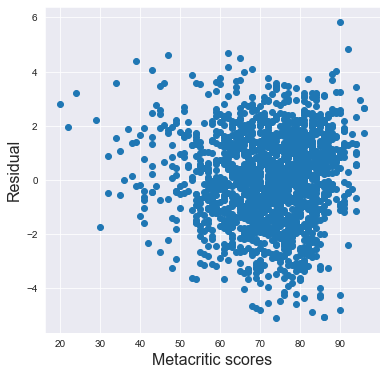

In [72]:
plt.figure(figsize = (6,6))

plt.scatter(df_train.Metacritic,res)

plt.xlabel("Metacritic scores", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

In [73]:
df_train.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

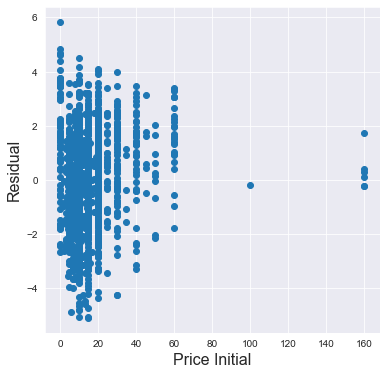

In [79]:
plt.figure(figsize = (6,6))

plt.scatter(df_train.PriceInitial,res)

plt.xlabel("Price Initial", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

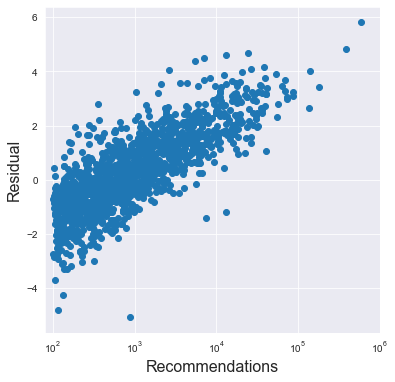

In [87]:
plt.figure(figsize = (6,6))

plt.scatter(df_train.RecommendationCount,res)

plt.xlabel("Recommendations", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.xscale('log')
plt.xlim(10**1.9,10**6)

plt.show()

## Maybe this means that Recommendation Counts are correlated with the residual relationship between Metacritic scores and No_of_Players. Let's check that

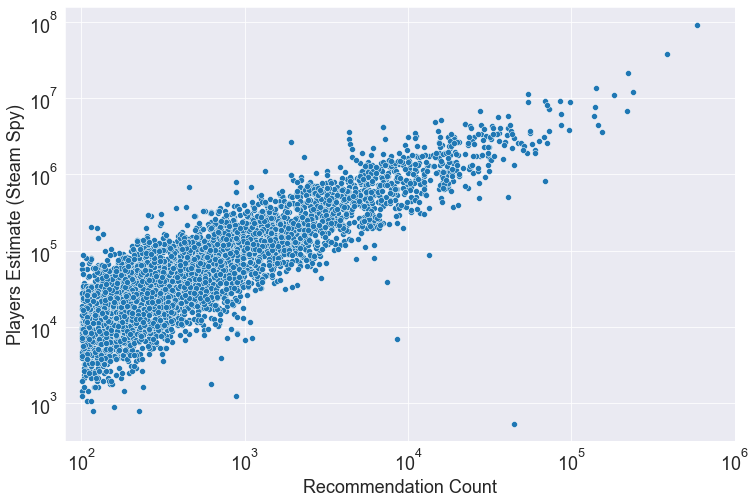

In [91]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='RecommendationCount',y='SteamSpyPlayersEstimate',data=df)

plt.xlabel("Recommendation Count",fontsize=18)
plt.ylabel("Players Estimate (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
plt.xscale('log')
plt.xlim(10**1.9,10**6)

plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
plt.savefig("Players vs Recommendation Count.jpg")

plt.show()

Beautiful! This should not exist for, say PriceInitial (done)

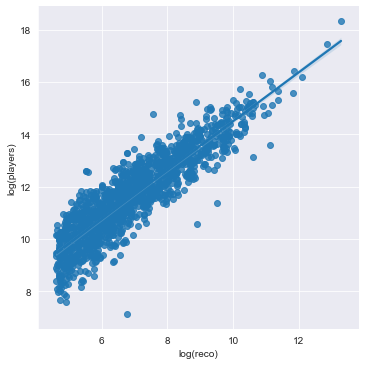

In [187]:
sns.lmplot(x='log(reco)',y='log(players)',data=df_train)

plt.savefig('players vs reco count.png')

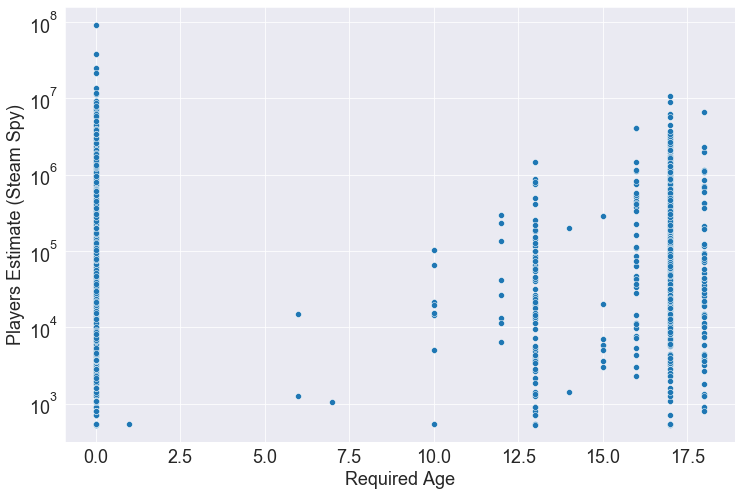

In [124]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='RequiredAge',y='SteamSpyPlayersEstimate',data=df)

plt.xlabel("Required Age",fontsize=18)
plt.ylabel("Players Estimate (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
# plt.xscale('log')
# plt.xlim(10**(-0.5),10**3)

plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("Players vs Recommendation Count.jpg")

plt.show()

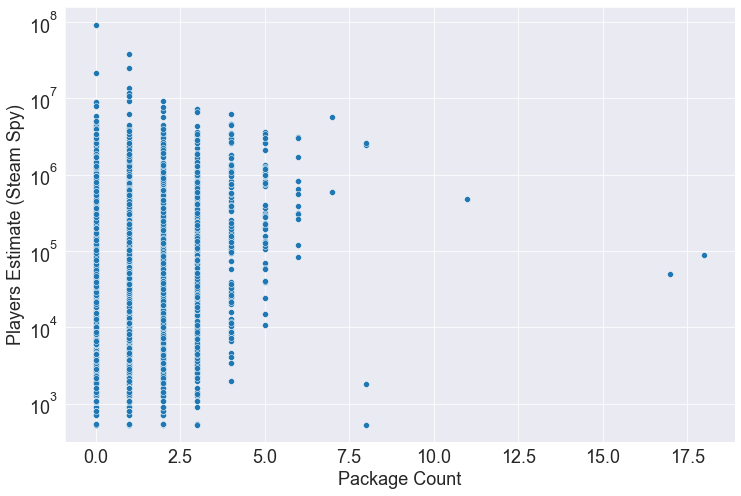

In [125]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='PackageCount',y='SteamSpyPlayersEstimate',data=df)

plt.xlabel("Package Count",fontsize=18)
plt.ylabel("Players Estimate (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
# plt.xscale('log')
# plt.xlim(10**(-0.5),10**3)

plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("Players vs Recommendation Count.jpg")

plt.show()

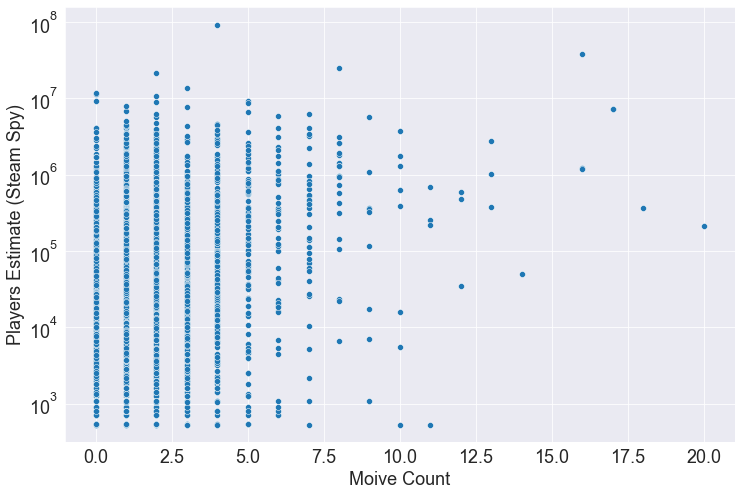

In [126]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='MovieCount',y='SteamSpyPlayersEstimate',data=df)

plt.xlabel("Moive Count",fontsize=18)
plt.ylabel("Players Estimate (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
# plt.xscale('log')
# plt.xlim(10**(-0.5),10**3)

plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("Players vs Recommendation Count.jpg")

plt.show()

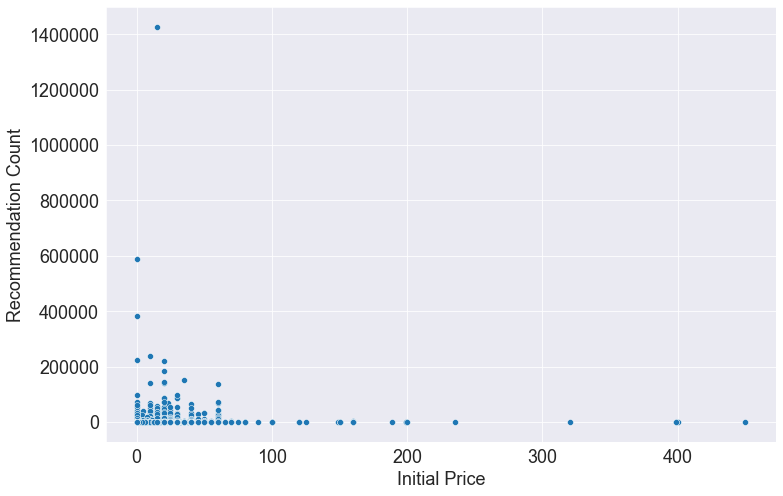

In [145]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(y='RecommendationCount',x='PriceInitial',data=df)

plt.ylabel("Recommendation Count",fontsize=18)
plt.xlabel("Initial Price",fontsize=18)

# plt.legend(fontsize=14)
plt.yticks(fontsize=18)
# plt.yscale('log')
# plt.ylim(10**1.9,10**6)

plt.xticks(fontsize=18)
# plt.xscale('log')
# plt.xlim(10**(-0.5),10**3)
# plt.savefig("Players vs Recommendation Count.jpg")

plt.show()

In [142]:
df[df.PriceInitial>300]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
3222,278210,278210,Vegas Pro 13 Edit - Steam Powered,VEGAS Pro 13 Edit - Steam Powered,Nov 2 2015,0,0,1,0,0,...,,,English French German Spanish Japanese,http://www.vegascreativesoftware.com/us/vegas-...,Minimum:OS: 64-bit Microsoft(r) Windows 7 Wind...,Recommended:OS: 64-bit Microsoft(r) Windows 7 ...,,,,
4030,304970,304970,SolidFace Pro 2015,SolidFace Parametric CAD Modeler 2D/3D,Dec 22 2014,0,0,2,0,0,...,,,English* Portuguese-Brazil**languages with ful...,http://www.solidface.com/,Minimum:OS: Support Windows (r) XP/Vista/7/8Pr...,Recommended:OS: Support Windows (r) XP/Vista/7...,,,,
5017,335930,335930,Atavism 2 On Premises,Atavism MMO Creator,Jan 20 2015,0,0,1,0,0,...,Atavism Online Neojac Entertainment Neos Land ...,,English**languages with full audio support,http://www.atavismonline.com/,Minimum:OS: Windows XP SP2+Memory: 2 GB RAMDir...,Recommended:OS: Windows 7Processor: Intel i5Me...,,,Minimum:OS: Mac OS X 10.6+Memory: 2 GB RAMNetw...,Recommended:OS: Mac OS X 10.6+Memory: 3 GB RAM...
12271,528200,528200,VEGAS Pro 14 Edit Steam Edition,VEGAS Pro 14 Edit Steam Edition,Sep 30 2016,0,0,1,0,0,...,Copyright (c) MAGIX Software GmbH 2016. VEGAS ...,,English French German Spanish,http://www.vegascreativesoftware.com,Minimum:OS: Windows 7 | 8 | 8.1 | 10 (64-bit)P...,Recommended:OS: Windows 7 | 8 | 8.1 | 10 (64-b...,,,,
12838,528100,528100,Marvelous Designer 6 For Steam,Marvelous Designer 6 For Steam,Nov 23 2016,0,0,1,0,0,...,,,English Simplified Chinese Korean,http://www.marvelousdesigner.com/,Minimum:OS: Microsoft Windows Vista (64bit)Pro...,Recommended:OS: Microsoft Windows Vista/7/8/8....,,,,


In [130]:
df.CategoryCoop.unique()

array([False,  True])

In [122]:
df_train.PriceFinal.unique()

array([ 9.99, 19.99,  2.99,  4.99,  0.  , 14.99, 17.99,  3.74, 29.99,
       24.99,  1.74, 12.99,  7.99, 39.99,  3.99, 49.99,  6.99, 15.99,
        3.89,  0.49,  5.99, 59.99,  2.49,  8.99, 18.99,  8.24,  4.94,
        1.99, 35.99, 16.99, 13.99, 12.74, 11.99, 12.  , 34.99,  7.49,
       13.59,  6.49,  6.69, 44.99, 99.99, 31.99,  0.99, 19.19, 23.99,
       10.99,  1.24,  8.49,  1.49, 12.89,  0.79,  4.79, 13.39,  9.37])

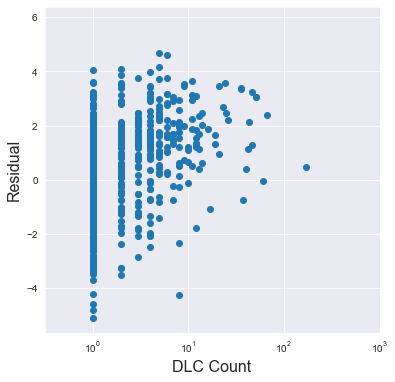

In [101]:
plt.figure(figsize = (6,6))

plt.scatter(df_train.DLCCount,res)

plt.xlabel("DLC Count", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.xscale('log')
plt.xlim(10**(-0.5),10**3)

plt.show()

Let's continue with testing for linearity assumptions. Normality is next

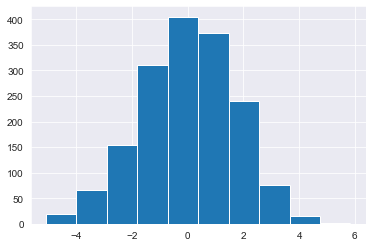

In [93]:
plt.hist(res)
plt.show()

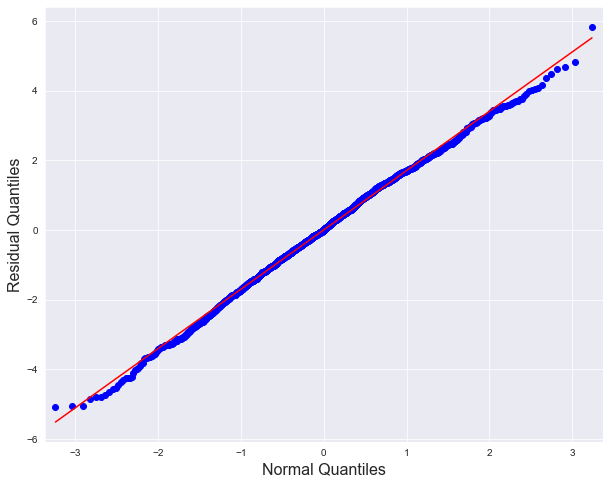

In [102]:
import statsmodels.api as sm 

fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)

plt.show()

Homoscedasticity

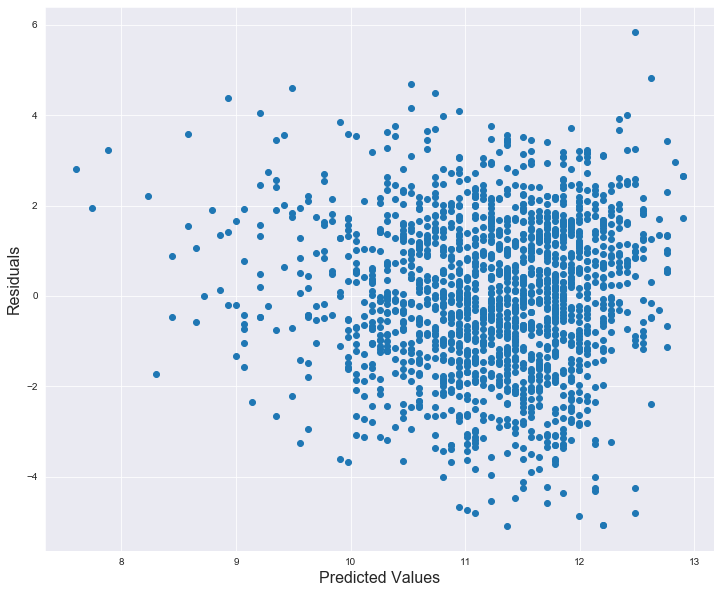

In [104]:
pred = beta_0_hat + beta_1_hat * df_train.Metacritic.values

plt.figure(figsize=(12,10))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)

plt.show()

p-value

In [105]:
fit = sm.OLS(df_train['log(players)'],sm.add_constant(df_train['Metacritic']),).fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())
print(beta_1_hat)

                            OLS Regression Results                            
Dep. Variable:           log(players)   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     354.6
Date:                Sat, 15 May 2021   Prob (F-statistic):           7.51e-72
Time:                        17:40:24   Log-Likelihood:                -3249.7
No. Observations:                1665   AIC:                             6503.
Df Residuals:                    1663   BIC:                             6514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2040      0.270     22.961      0.0

# Predictive Modeling

In [107]:
## Model Building with sklearn
warnings.filterwarnings('ignore', category=DeprecationWarning)

# first we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [111]:
## Now we make a model object
slr = LinearRegression(copy_X = True)

## Now we fit the model
## first goes the input variables
## Then the output variables
## If the input is a 1-D vector you need to reshape it
slr.fit(df_train['Metacritic'].values.reshape(-1,1), df_train['log(players)'].values)

## Now we can see the coefficients
print("beta_1_hat is", slr.coef_[0])
print("beta_0_hat is", slr.intercept_)

print()

## Let's compare that to what we computed
print("We computed beta_1_hat to be", beta_1_hat)
print("We compute beta_0_hat to be", beta_0_hat)

## We can make predictions like so
# min_rd = baseball_train.RD.min()
# max_rd = baseball_train.RD.max()
# padding = 20
# x = np.linspace(min_rd - padding,max_rd + padding,10)

slr.predict(x.reshape(-1,1))

beta_1_hat is 0.06979313668264576
beta_0_hat is 6.203977825206317

We computed beta_1_hat to be 0.06979313668264578
We compute beta_0_hat to be 6.203977825206315


array([ 6.20397783,  6.21208193,  6.22018604,  6.22829015,  6.23639426,
        6.24449837,  6.25260247,  6.26070658,  6.26881069,  6.2769148 ,
        6.2850189 ,  6.29312301,  6.30122712,  6.30933123,  6.31743534,
        6.32553944,  6.33364355,  6.34174766,  6.34985177,  6.35795588,
        6.36605998,  6.37416409,  6.3822682 ,  6.39037231,  6.39847642,
        6.40658052,  6.41468463,  6.42278874,  6.43089285,  6.43899696,
        6.44710106,  6.45520517,  6.46330928,  6.47141339,  6.4795175 ,
        6.4876216 ,  6.49572571,  6.50382982,  6.51193393,  6.52003804,
        6.52814214,  6.53624625,  6.54435036,  6.55245447,  6.56055858,
        6.56866268,  6.57676679,  6.5848709 ,  6.59297501,  6.60107912,
        6.60918322,  6.61728733,  6.62539144,  6.63349555,  6.64159966,
        6.64970376,  6.65780787,  6.66591198,  6.67401609,  6.6821202 ,
        6.6902243 ,  6.69832841,  6.70643252,  6.71453663,  6.72264073,
        6.73074484,  6.73884895,  6.74695306,  6.75505717,  6.76

Training MSE

In [113]:
## This function calculates the MSE
def mse(y,y_pred,r):
    return np.round(np.sum((y-y_pred)**2)/len(y),r)


## Here we calculate the MSE on the training data
y_train = df_train['log(players)'].values
y_train_pred = slr.predict(df_train.Metacritic.values.reshape(-1,1))

print("The training MSE is",mse(y_train,y_train_pred,4))

The training MSE is 2.9026


Test MSE

In [114]:
y_test = df_test['log(players)'].values
y_test_pred = slr.predict(df_test.Metacritic.values.reshape(-1,1))


print("The test MSE is",mse(y_test,y_test_pred,4))

The test MSE is 3.2904


# Multiple Linear Regression on Log(Players)

In [135]:
df_train=df_train.loc[df_train.RecommendationCount>0]

df_train['log(reco)']=np.log(df_train.RecommendationCount)

In [136]:
df_train.corr()['log(players)'].sort_values()

QueryID                       -0.333783
ResponseID                    -0.333771
GenreIsIndie                  -0.223709
CategorySinglePlayer          -0.163202
GenreIsAdventure              -0.161197
PurchaseAvail                 -0.152530
GenreIsCasual                 -0.055178
CategoryVRSupport             -0.051215
GenreIsRacing                 -0.034817
PCReqsHaveMin                 -0.031898
GenreIsStrategy               -0.028044
FreeVerAvail                  -0.022846
SubscriptionAvail             -0.006225
GenreIsSimulation             -0.000109
GenreIsSports                  0.007657
LinuxReqsHaveMin               0.013830
LinuxReqsHaveRec               0.021175
MacReqsHaveRec                 0.040102
AchievementHighlightedCount    0.040599
MacReqsHaveMin                 0.042709
GenreIsEarlyAccess             0.047016
ControllerSupport              0.048732
DemoCount                      0.051999
PCReqsHaveRec                  0.057786
PlatformMac                    0.069137


In [137]:
from pandas.plotting import scatter_matrix

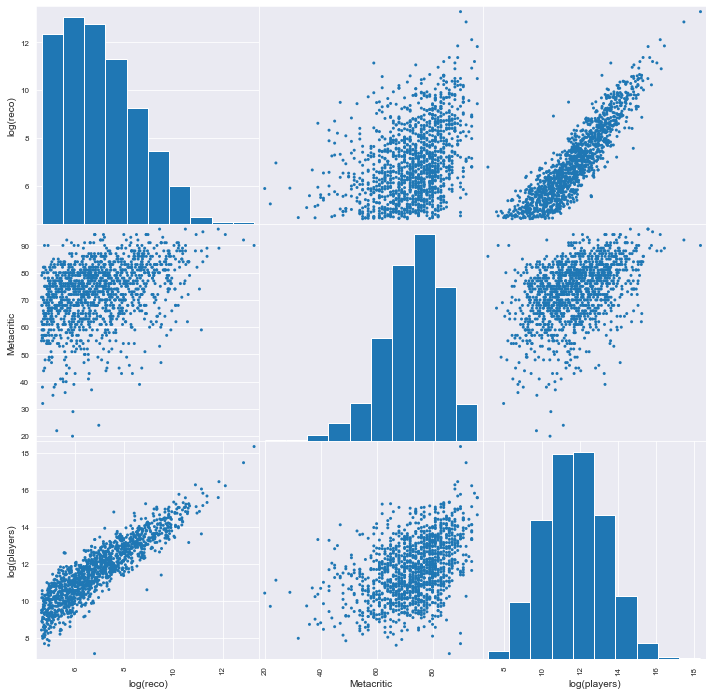

In [138]:
cols=['log(reco)','Metacritic','log(players)']

scatter_matrix(df_train[cols], figsize = (12,12), alpha = 1)

plt.show()

In [153]:
df_train[['log(reco)','Metacritic']].iloc[:5]

,log(reco),Metacritic
2987,5.342334,80
1173,8.787831,86
1423,7.504392,63
1275,6.538140,65
999,8.988321,84


In [159]:
mlrfit = sm.OLS(df_train['log(players)'],sm.add_constant(df_train[['log(reco)','Metacritic']])).fit()

# fit.summary makes a snazy table for us to look at
print(mlrfit.summary())

                            OLS Regression Results                            
Dep. Variable:           log(players)   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     3010.
Date:                Sat, 15 May 2021   Prob (F-statistic):               0.00
Time:                        20:29:08   Log-Likelihood:                -1428.7
No. Observations:                1360   AIC:                             2863.
Df Residuals:                    1357   BIC:                             2879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2081      0.132     31.881      0.0

In [162]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(copy_X = True)

reg.fit(df_train[['log(reco)','Metacritic']],df_train['log(players)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
## get the prediction this is where meshgrid comes in handy
x1s = np.linspace(df_train['log(reco)'].min(), df_train['log(reco)'].max(), 10)
x2s = np.linspace(df_train['Metacritic'].min(), df_train['Metacritic'].max(), 10)

## this makes a meshgrid
x1v, x2v = np.meshgrid(x1s, x2s)

## combine x1v and x2v into a single array for prediction
X_grid = np.concatenate([x1v.reshape(-1,1), x2v.reshape(-1,1)], axis=1)

## predict at each grid point
pred_grid = reg.predict(X_grid)

## add the predictions to the grid array
X_grid = np.concatenate([X_grid, pred_grid.reshape(-1,1)], axis=1)

In [165]:
from mpl_toolkits.mplot3d import Axes3D

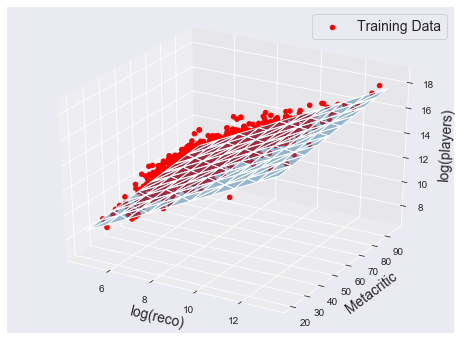

In [178]:
%matplotlib inline
## Now we plot the regression plane
## along with the training observations

## Make a figure object
fig = plt.figure(figsize=(8,6))

## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')

## plot_trisurf makes a surface out of triangles
## it will take in the TV grid on the x-axis
## the radio grid on the y-axis
## and the prediction grid on the z-axis
## alpha <1 allows us to see through the surface
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], X_grid[:,2], alpha=0.4)

## scatter will plot the observations from the training set
ax.scatter(df_train['log(reco)'], df_train['Metacritic'], df_train['log(players)']
           , c="r", alpha=1, label="Training Data")

## Add labels
ax.set_xlabel("log(reco)", fontsize=14)
ax.set_ylabel("Metacritic", fontsize=14)
ax.set_zlabel("log(players)", fontsize=14)

plt.legend(fontsize=14)

plt.show()

In [177]:
plt.close()